In [6]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import html5lib

# Define Graphing Function

In [40]:

import matplotlib.pyplot as plt

def make_graph(data, title):
    """
    Plots a stock data graph.
    
    Parameters:
    - data: DataFrame containing 'Date' and 'Close' columns.
    - title: Title for the graph.
    """
    plt.figure(figsize=(12, 6))
    plt.plot(data['Date'], data['Close'], label='Close Price', color='blue')
    plt.xlabel("Date")
    plt.ylabel("Close Price (USD)")
    plt.title(title)
    plt.legend()
    plt.grid()
    plt.show()

# Question 1: Use yfinance to Extract Stock Data

In [9]:
tes = yf.Ticker('TSLA')
tesla_data = tes.history(period='max')
tesla_data.reset_index(inplace=True)
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


# Question 2: Use Webscraping to Extract Tesla Revenue Data

In [43]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

# URL and HTML data
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
html_data = requests.get(url).text
soup = BeautifulSoup(html_data, "html5lib")

# Read the table with revenue data
tesla_revenue = pd.read_html(url, match="Tesla Quarterly Revenue", flavor='bs4')[0]

# Rename columns for clarity
tesla_revenue = tesla_revenue.rename(
    columns={
        'Tesla Quarterly Revenue (Millions of US $)': 'Date',
        'Tesla Quarterly Revenue (Millions of US $).1': 'Revenue',
    },
    inplace=False
)

# Remove dollar signs and commas
tesla_revenue["Revenue"] = tesla_revenue["Revenue"].str.replace(r"[,\$]", "", regex=True)

# Drop missing or empty rows
tesla_revenue.dropna(inplace=True)
tesla_revenue = tesla_revenue[tesla_revenue["Revenue"] != ""]

# Convert "Revenue" to numeric if needed
tesla_revenue["Revenue"] = pd.to_numeric(tesla_revenue["Revenue"])

# Display the cleaned DataFrame
print(tesla_revenue.tail())

          Date  Revenue
48  2010-09-30       31
49  2010-06-30       28
50  2010-03-31       21
52  2009-09-30       46
53  2009-06-30       27


# Question 3: Use yfinance to Extract Stock Data #

In [53]:
gme = yf.Ticker("GME")
gme_data = gme.history(period='max')
gme_data.reset_index(inplace=True)
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691666,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683251,1.687459,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


# Question 4: Use Webscraping to Extract GME Revenue Data

In [54]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

# URL and HTML data
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
html_data = requests.get(url).text
soup = BeautifulSoup(html_data, "html5lib")

# Read the table with revenue data
gme_revenue = pd.read_html(url, match="GameStop Quarterly Revenue", flavor='bs4')[0]

# Rename columns for clarity
gme_revenue = gme_revenue.rename(
    columns={
        'GameStop Quarterly Revenue (Millions of US $)': 'Date',
        'GameStop Quarterly Revenue (Millions of US $).1': 'Revenue',
    },
    inplace=False
)

# Remove dollar signs and commas
gme_revenue["Revenue"] = gme_revenue["Revenue"].str.replace(r"[,\$]", "", regex=True)


# Drop missing or empty rows
gme_revenue.dropna(inplace=True)
gme_revenue = gme_revenue[gme_revenue["Revenue"] != ""]

# Convert "Revenue" to numeric if needed
gme_revenue["Revenue"] = pd.to_numeric(gme_revenue["Revenue"])

# Display the cleaned DataFrame
print(gme_revenue.tail())

          Date  Revenue
57  2006-01-31     1667
58  2005-10-31      534
59  2005-07-31      416
60  2005-04-30      475
61  2005-01-31      709


# Question 5: Plot Tesla Stock Graph

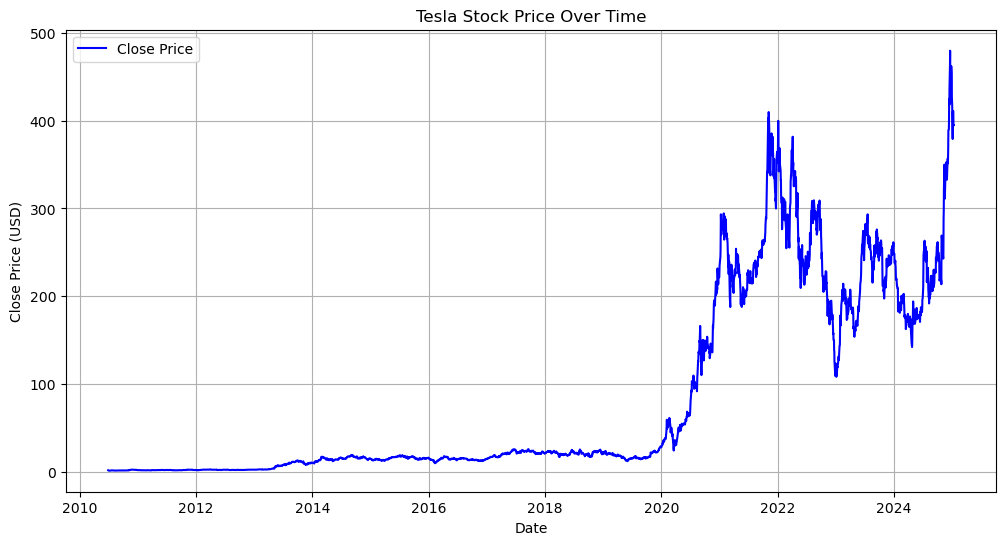

In [42]:
tesla_data['Date'] = pd.to_datetime(tesla_data['Date'])

# Sort by date to ensure chronological order
tesla_data = tesla_data.sort_values('Date')

# Plot Tesla stock data
make_graph(tesla_data, "Tesla Stock Price Over Time")

# Question 6: Plot GameStop Stock Graph


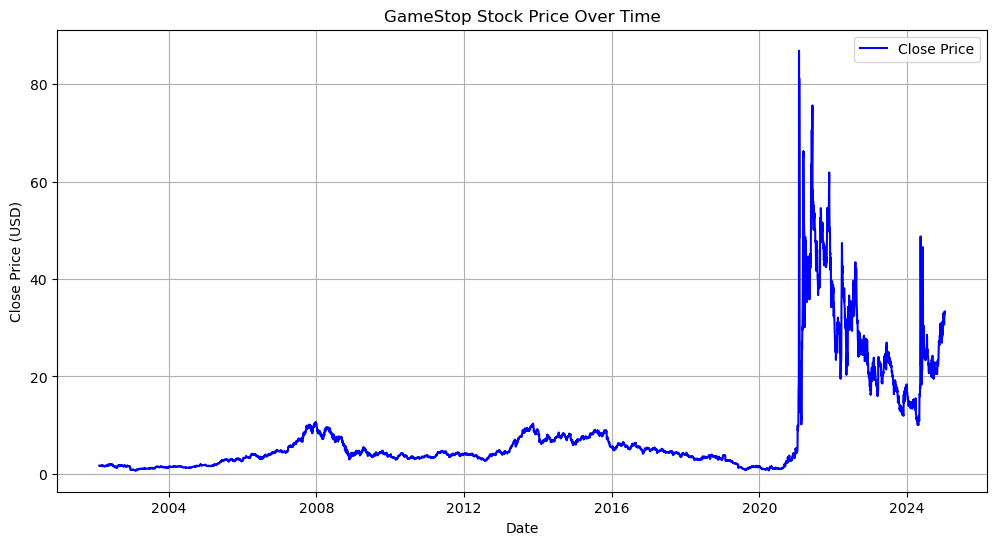

In [55]:
gme_data['Date'] = pd.to_datetime(gme_data['Date'])

# Sort by date to ensure chronological order
gme_data = gme_data.sort_values('Date')

# Plot gme stock data
make_graph(gme_data, "GameStop Stock Price Over Time")